#### Experiment 1

In [1]:
import sys
from parsing import parse_matrix_and_gap
from alignment import global_alignment_affine,global_alignment_linear

import time
import random
import matplotlib.pyplot as plt

In [9]:
substitution_matrix, gap_cost = parse_matrix_and_gap("data/subst_matrix_l.txt")

# Generate random sequences of varying lengths
seq_lengths = range(1000, 20000, 1000)
seqs = []
for l in seq_lengths:
    seqs.append((''.join([random.choice(['A', 'C', 'G', 'T']) for _ in range(l)]),
                ''.join([random.choice(['A', 'C', 'G', 'T']) for _ in range(l)])))
    

times = []
for v, w in seqs:
    start_time = time.time()
    global_alignment_linear(v, w, gap_cost,substitution_matrix)
    end_time = time.time()
    times.append(end_time - start_time)

In [7]:
len(times)

20

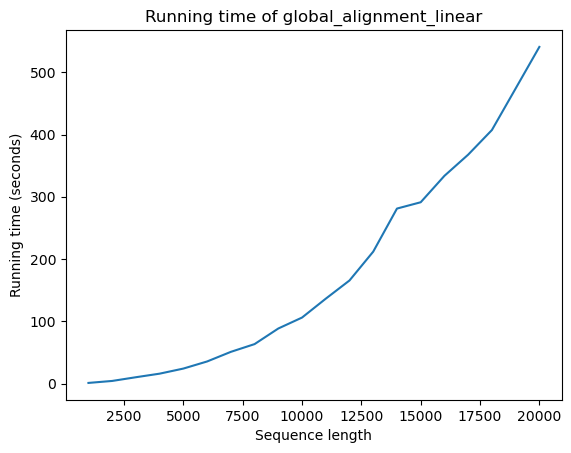

In [8]:
# Plot the results
plt.plot(seq_lengths[:20], times)
plt.xlabel('Sequence length')
plt.ylabel('Running time (seconds)')
plt.title('Running time of global_alignment_linear')
plt.show()

#### Experiment 2

In [2]:
substitution_matrix, gaps = parse_matrix_and_gap("subst_matrix_a.txt")

alpha = gaps[0]
beta = gaps[1]

# Generate random sequences of varying lengths
seq_lengths = range(1000, 2000, 100)
seqs = []
for l in seq_lengths:
    seqs.append((''.join([random.choice(['A', 'C', 'G', 'T']) for _ in range(l)]),
                ''.join([random.choice(['A', 'C', 'G', 'T']) for _ in range(l)])))
    

times = []
for v, w in seqs:
    start_time = time.time()
    global_alignment_affine(v,w,alpha,beta,substitution_matrix)
    end_time = time.time()
    times.append(end_time - start_time)

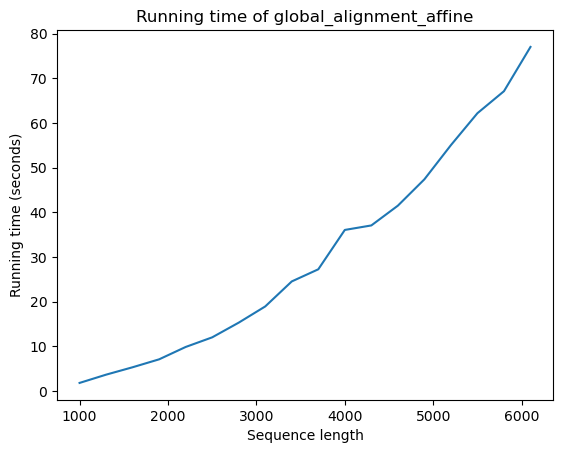

In [5]:
# Plot the results
plt.plot(seq_lengths[:len(times)], times)
plt.xlabel('Sequence length')
plt.ylabel('Running time (seconds)')
plt.title('Running time of global_alignment_affine')
plt.show()